 # EDA: Exploratory Data Analysis

This notebook explores air pollution and respiratory case trends across Lagos localities.  
We visualize seasonal patterns, pollution spikes, and respiratory case distributions.

---


## Import Packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Main_cleaned_air_pollution_data.csv')

df.head(10)


,city,date,pm2_5,pm10,no2,so2,o3,hospital_id,respiratory_cases,avg_age_of_patients,weather_temperature,weather_humidity,wind_speed,rainfall_mm,population_density,industrial_activity_index,year,month
0,Ikeja,2021-01-01,65.64,135.39,45.21,22.29,34.84,HOSP_IKE_1,16,44.0,25.1,40.0,3.1,2.2,22937.7,0.87,2021,1
1,Ikeja,2021-01-01,76.49,116.65,50.01,10.20,32.19,HOSP_IKE_4,12,33.1,25.3,53.5,3.8,2.2,21787.8,0.32,2021,1
2,Ikeja,2021-01-01,55.50,101.72,39.10,21.91,49.99,HOSP_IKE_1,20,33.5,27.7,72.3,4.7,1.0,14798.0,0.78,2021,1
3,Ikeja,2021-01-01,56.37,138.53,46.40,28.13,24.89,HOSP_IKE_8,15,49.3,32.8,62.9,4.8,8.2,18013.6,0.24,2021,1
4,Ikeja,2021-01-01,93.77,123.73,59.55,11.82,29.73,HOSP_IKE_3,20,45.4,27.9,64.8,3.4,9.1,25980.3,0.30,2021,1
5,Ikeja,2021-01-01,117.80,92.66,42.29,29.29,52.29,HOSP_IKE_1,17,24.1,31.9,75.9,2.1,6.0,15656.5,0.56,2021,1
6,Ikeja,2021-01-01,44.28,95.33,59.77,15.18,43.32,HOSP_IKE_9,15,35.0,29.2,56.6,4.0,0.8,22908.9,0.55,2021,1
7,Ikeja,2021-01-01,72.54,32.27,33.55,17.15,31.27,HOSP_IKE_3,15,42.6,28.0,74.0,1.9,4.1,20353.4,0.48,2021,1
8,Ikeja,2021-01-01,66.59,99.63,44.77,20.85,27.39,HOSP_IKE_3,15,34.8,32.6,77.4,4.3,1.2,26901.3,0.32,2021,1
9,Ikeja,2021-01-01,41.08,81.13,60.03,28.41,39.78,HOSP_IKE_4,11,21.3,26.8,52.3,2.1,6.1,18177.3,0.25,2021,1


In [ ]:
## confirm this is the data with with no NaN values
df.isna().sum()

,0
city,0
date,0
pm2_5,0
pm10,0
no2,0
so2,0
o3,0
hospital_id,0
respiratory_cases,0
avg_age_of_patients,0


1.1 Visualize pollution trends over time by city

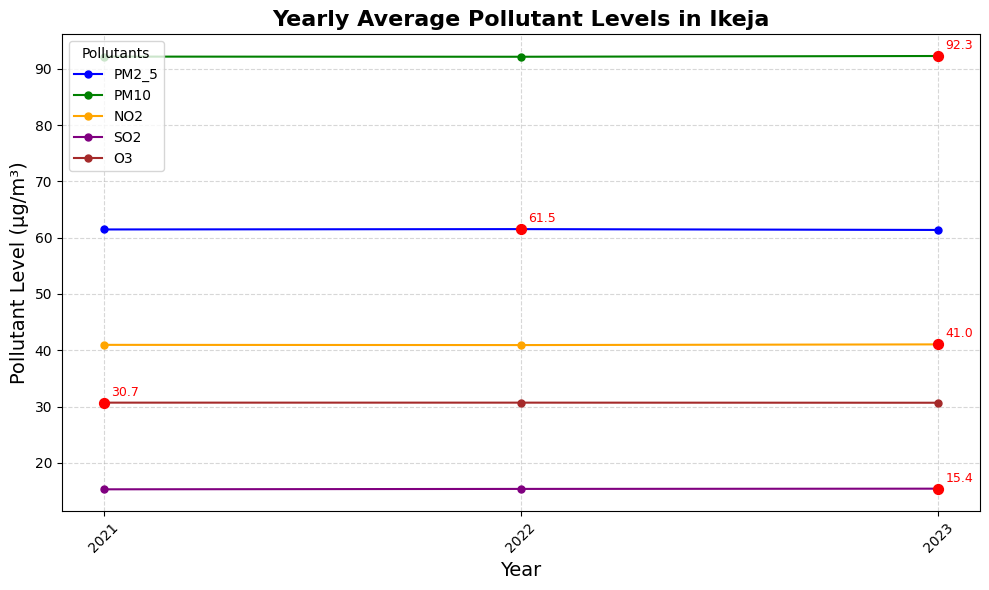

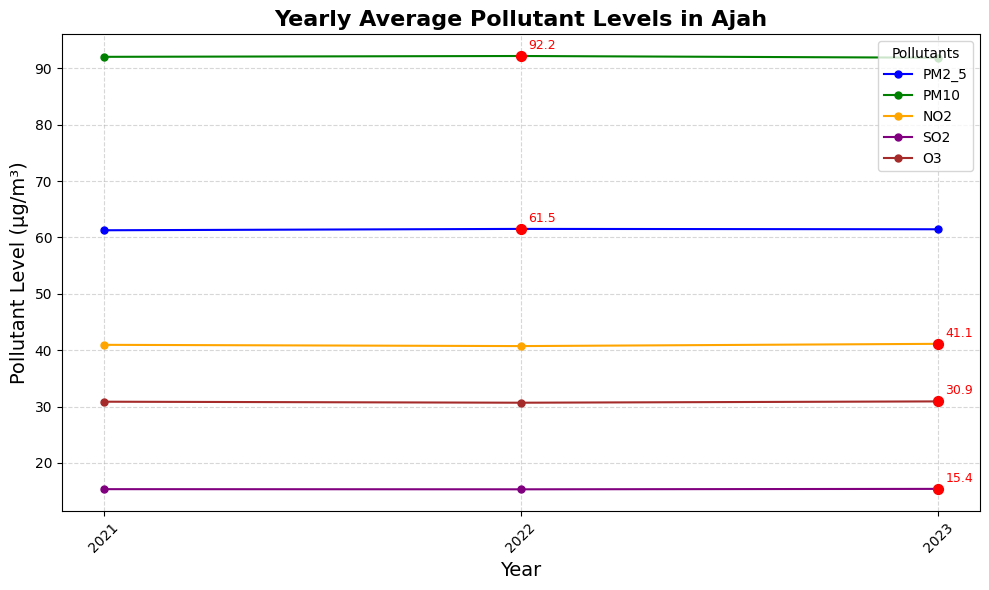

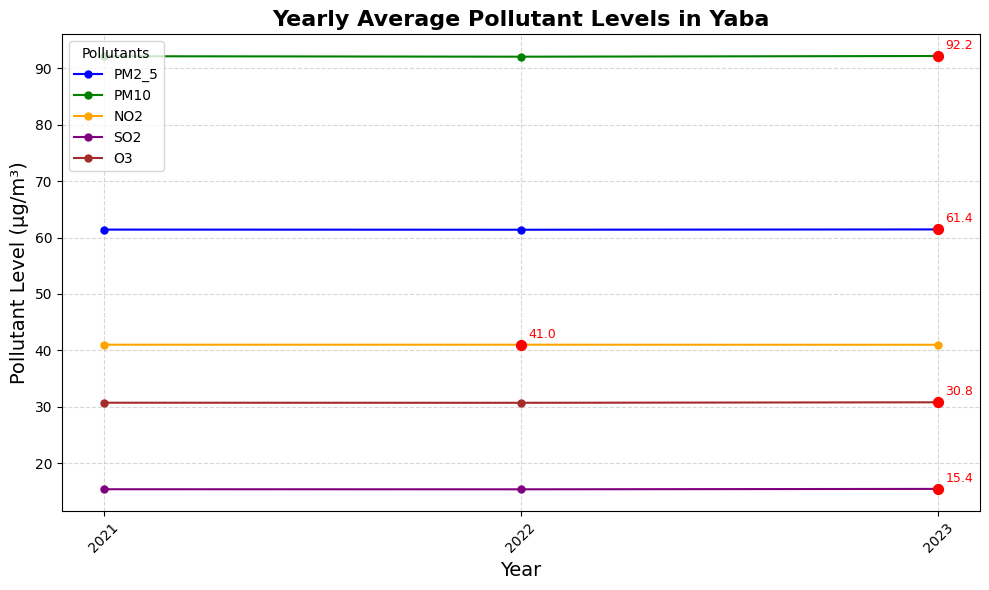

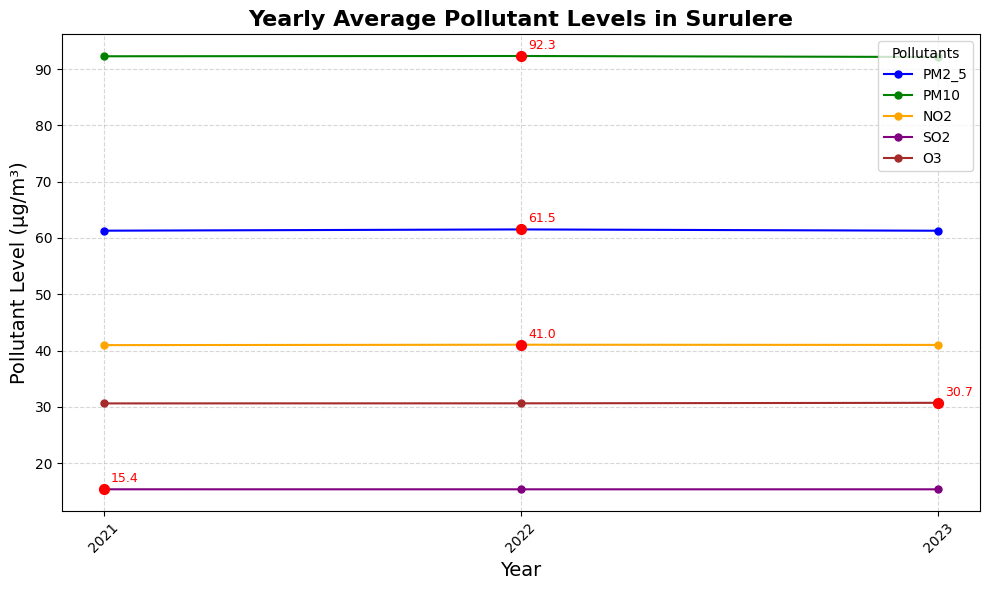

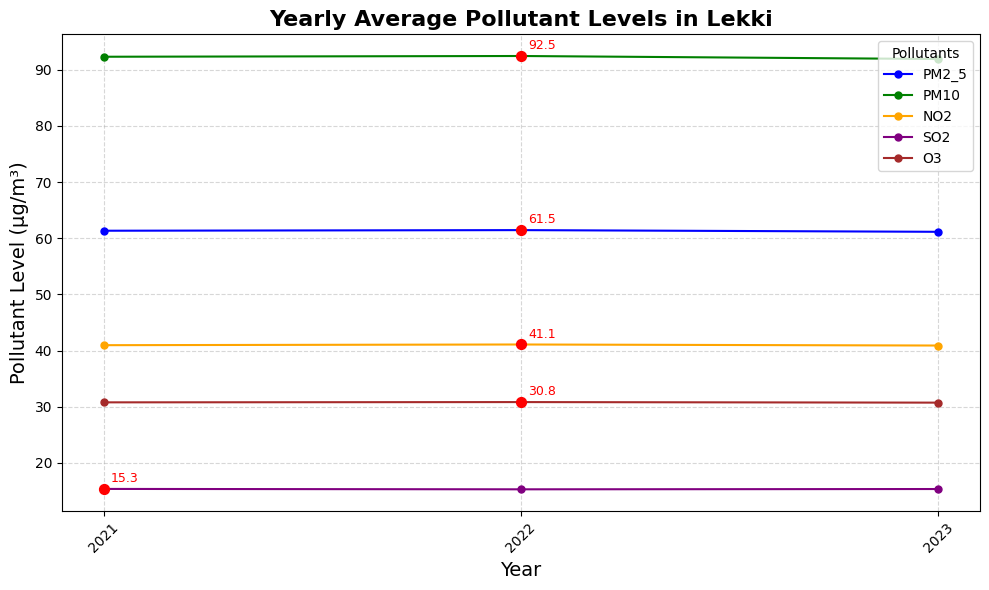

In [ ]:
cities = ['ikeja', 'ajah', 'yaba', 'surulere', 'lekki']
pollutants = ['pm2_5', 'pm10', 'no2', 'so2', 'o3']

colors = {
    'pm2_5': 'blue',
    'pm10': 'green',
    'no2': 'orange',
    'so2': 'purple',
    'o3': 'brown'
}

for city in cities:
    city_data = df[df['city'].str.strip().str.lower() == city].copy()

    if city_data.empty:
        print(f"No data to plot for {city.capitalize()}")
        continue

    city_data['date'] = pd.to_datetime(city_data['date'])

    yearly_avg = city_data.groupby(city_data['date'].dt.year)[pollutants].mean().reset_index()
    yearly_avg.rename(columns={'date': 'year'}, inplace=True)

    if yearly_avg.empty:
        print(f"No yearly data to plot for {city.capitalize()}")
        continue

    yearly_avg['year_datetime'] = pd.to_datetime(yearly_avg['year'], format='%Y', errors='coerce')

    plt.figure(figsize=(10, 6))

    for pollutant in pollutants:
        plt.plot(yearly_avg['year_datetime'], yearly_avg[pollutant],
                 marker='o', markersize=5, label=pollutant.upper(), color=colors[pollutant])

        peak_idx = yearly_avg[pollutant].idxmax()
        peak_year = yearly_avg.loc[peak_idx, 'year_datetime']
        peak_value = yearly_avg.loc[peak_idx, pollutant]

        plt.scatter(peak_year, peak_value, color='red', s=50, zorder=5)
        plt.annotate(f'{peak_value:.1f}', xy=(peak_year, peak_value), xytext=(5, 5), textcoords='offset points',
                     color='red', fontsize=9)

    plt.title(f'Yearly Average Pollutant Levels in {city.capitalize()}', fontsize=16, weight='bold')
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Pollutant Level (µg/m³)', fontsize=14)
    plt.legend(title='Pollutants')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## *Respiratory* cases by city

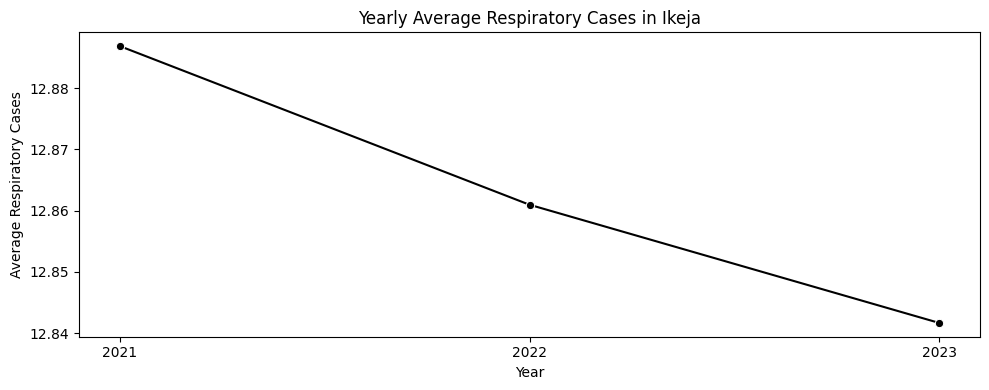

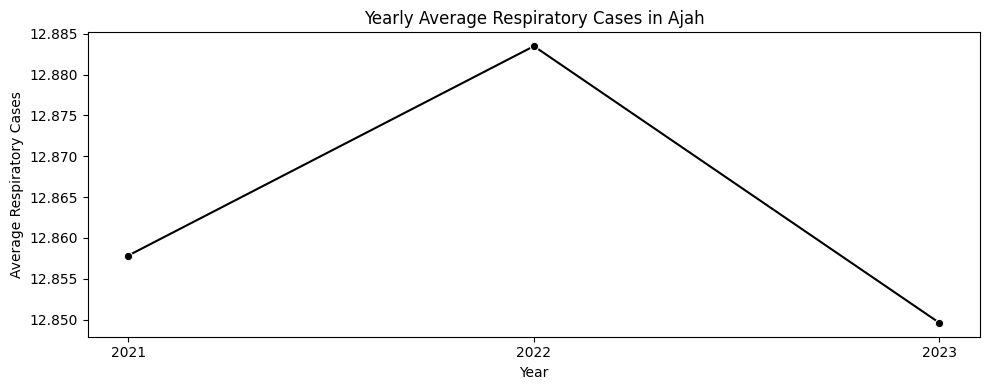

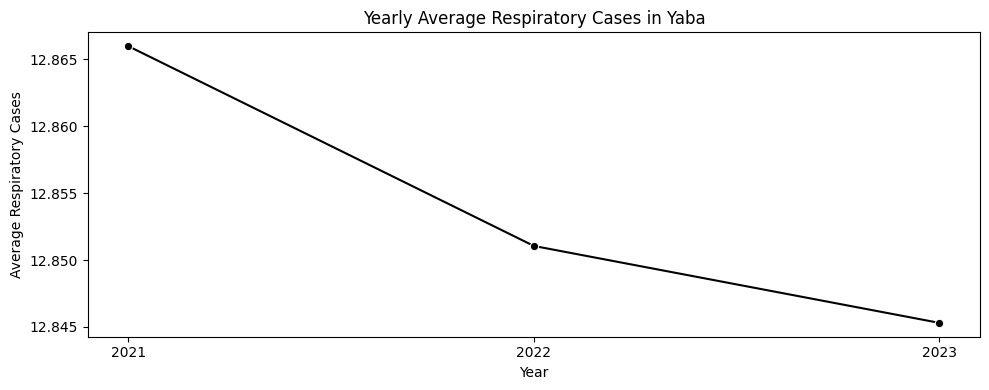

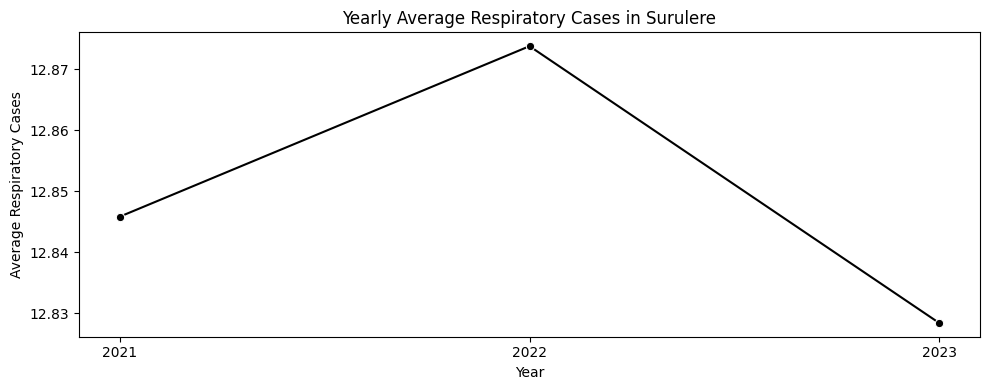

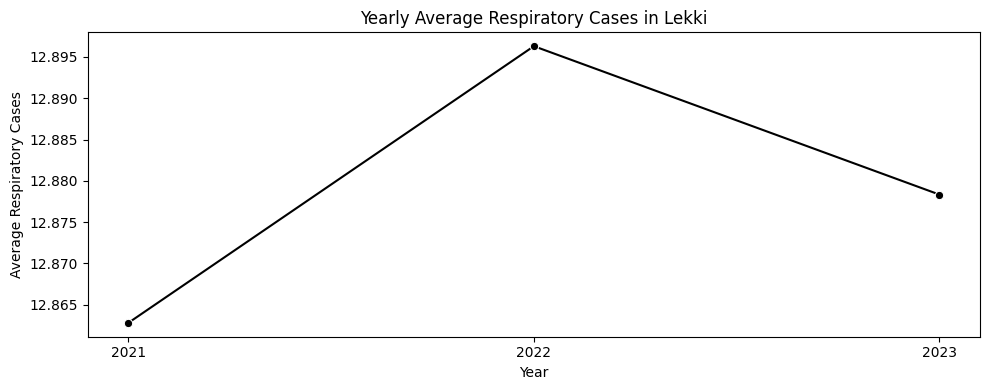

In [ ]:
# Filter data for a specific city and calculate yearly average respiratory cases
cities = ['Ikeja', 'Ajah', 'Yaba', 'Surulere', 'Lekki'] # Use the list of cities

for city in cities:
    city_data = df[df['city'].str.strip().str.lower() == city.lower()].copy()

    if not city_data.empty:
        city_data['date'] = pd.to_datetime(city_data['date'])
        city_yearly = city_data.groupby(city_data['date'].dt.year)['respiratory_cases'].mean().reset_index()
        city_yearly.rename(columns={'date': 'year'}, inplace=True)

        # Plot respiratory cases yearly trend (separate simple line chart)
        plt.figure(figsize=(10,4))
        sns.lineplot(x='year', y='respiratory_cases', data=city_yearly, marker='o', color='black')
        plt.title(f'Yearly Average Respiratory Cases in {city.capitalize()}')
        plt.xlabel('Year')
        plt.ylabel('Average Respiratory Cases')
        plt.xticks(city_yearly['year'])
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for {city.capitalize()}")

## Seasonal Pollution Levels in Lagos — Comparing Dry and Rainy Seasons

In this step, we compare the average pollutant levels during the **Dry** and **Rainy** seasons in Lagos.

The goal is to clearly show how pollution varies between these two main seasons in Nigeria, using a simple and easy-to-understand bar chart.

We will calculate the mean pollutant levels for each season and plot them side-by-side.

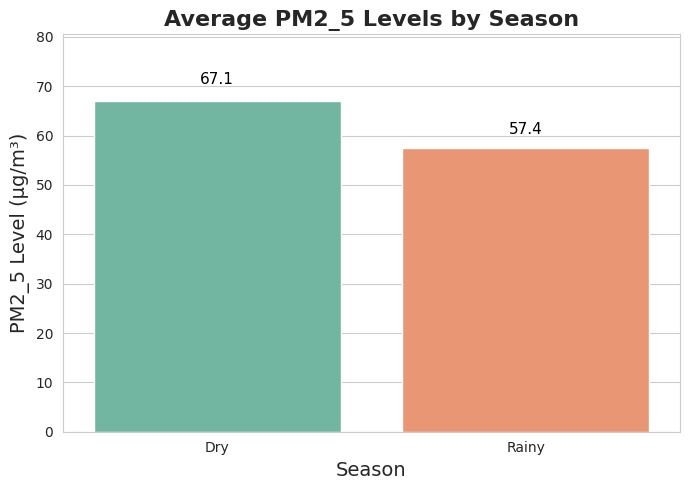

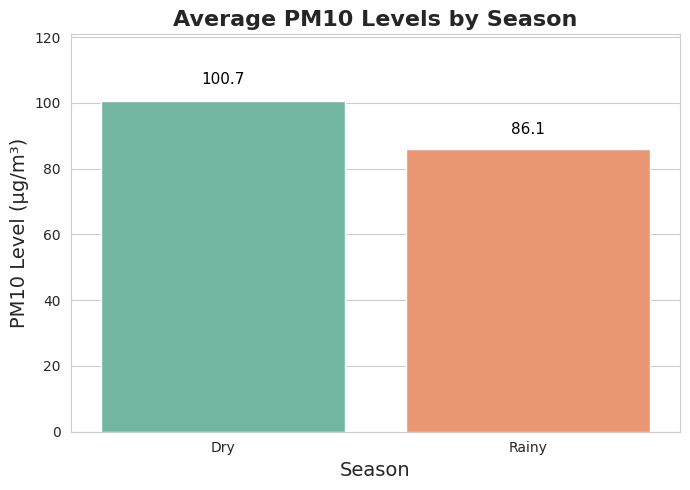

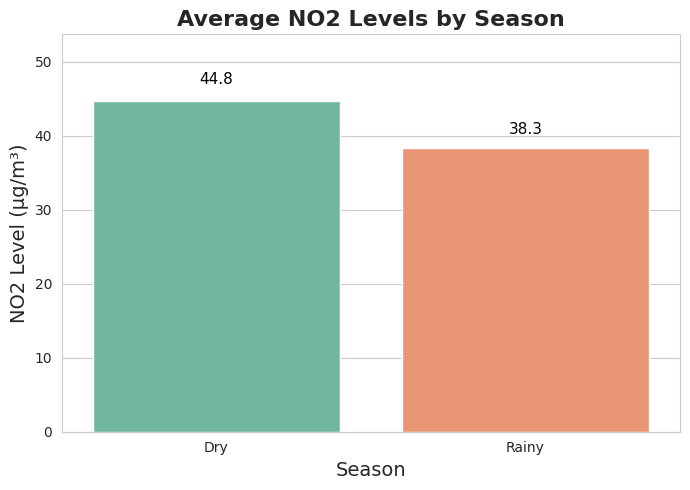

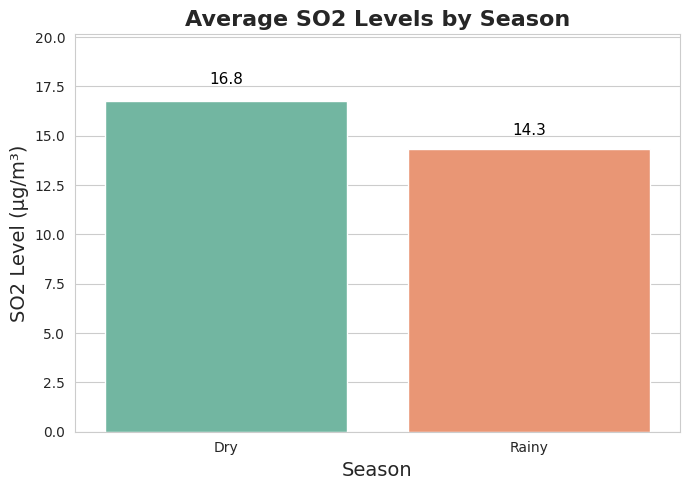

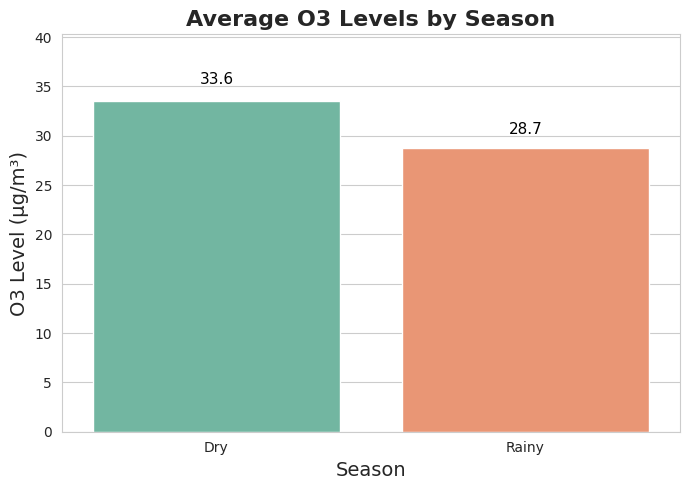

In [ ]:
# Set plot style for better aesthetics
sns.set_style('whitegrid')

# Define dry and rainy season months for Lagos
# Assuming Dry Season: November - March, Rainy Season: April - October
dry_season_months = [11, 12, 1, 2, 3]
rainy_season_months = [4, 5, 6, 7, 8, 9, 10]

# Function to determine the season based on the month
def get_season(month):
    if month in dry_season_months:
        return 'Dry'
    elif month in rainy_season_months:
        return 'Rainy'
    else:
        return 'Unknown' # Handle any unexpected month values

# Apply the function to create the 'season' column
df['season'] = df['month'].apply(get_season)

# Define the order for seasons on the plot
season_order = ['Dry', 'Rainy']

# Loop through each pollutant to create individual plots
for pollutant in pollutants:

    # Check if pollutant and season columns exist in dataframe
    if pollutant in df.columns and 'season' in df.columns:

        plt.figure(figsize=(7, 5))  # Set figure size

        # Calculate mean pollutant levels grouped by season and order them
        season_means = df.groupby('season')[pollutant].mean().reindex(season_order)

        # Create bar plot of mean pollutant levels by season
        sns.barplot(x=season_means.index, y=season_means.values, palette='Set2')

        # Add title and axis labels with formatting
        plt.title(f'Average {pollutant.upper()} Levels by Season', fontsize=16, weight='bold')
        plt.xlabel('Season', fontsize=14)
        plt.ylabel(f'{pollutant.upper()} Level (µg/m³)', fontsize=14)

        # Annotate each bar with its numeric value, slightly above the bar top
        for i, val in enumerate(season_means.values):
            plt.text(i, val + val*0.05, f'{val:.1f}', ha='center', fontsize=11, color='black')

        # Set y-axis limit to 20% above max value for breathing room
        plt.ylim(0, season_means.max()*1.2)

        plt.tight_layout()  # Adjust layout to fit elements neatly

        # Save plot as PNG file if requested
        # if save_plots:
        #     plt.savefig(f'{save_path}{pollutant}_seasonal_avg.png')

        plt.show()  # Display the plot

    else:
        # Warn if pollutant or season column is missing
        print(f"Skipping {pollutant}: missing in dataframe or 'season' column missing.")

###  Identify Zones and Months with Higher Respiratory Cases and Pollution Levels

This step explores which zones (cities) have higher respiratory cases and which months generally experience higher pollution levels.  
We use bar charts to make this straightforward and easy to interpret for any audience.


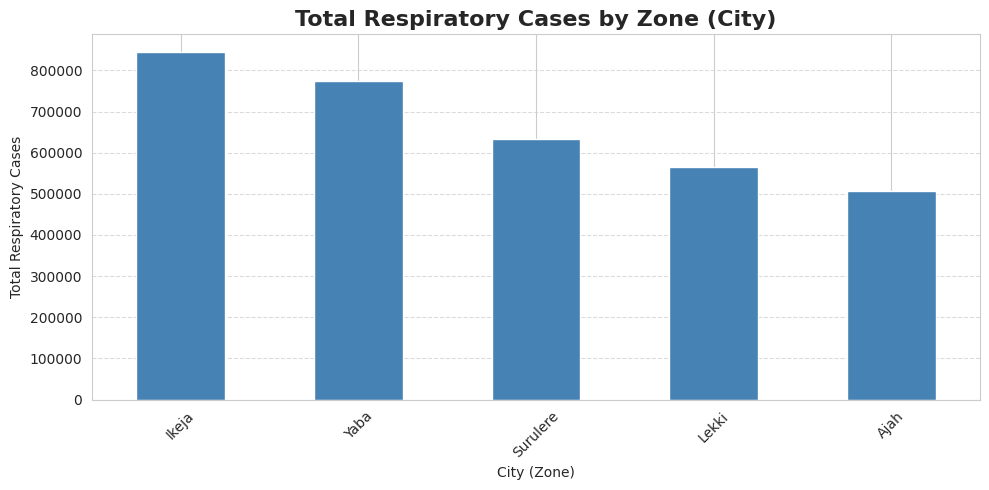

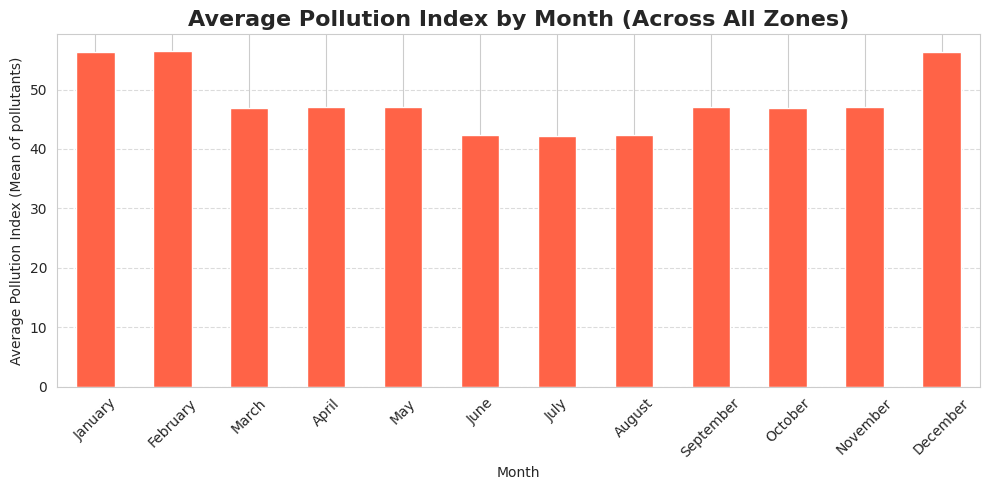

In [ ]:
# Aggregate total respiratory cases by city (zone)
cases_by_city = df.groupby('city')['respiratory_cases'].sum().sort_values(ascending=False)

# Aggregate average pollution by month (across all cities)
pollution_by_month = df.groupby('month')[pollutants].mean()
pollution_by_month['pollution_index'] = pollution_by_month.mean(axis=1)

import calendar

# Convert month number to month name for better readability
pollution_by_month['month_name'] = pollution_by_month.index.map(lambda x: calendar.month_name[x])

# Plot 1: Respiratory Cases by Zone (City)
plt.figure(figsize=(10,5))
cases_by_city.plot(kind='bar', color='steelblue')
plt.title('Total Respiratory Cases by Zone (City)', fontsize=16, weight='bold')
plt.xlabel('City (Zone)')
plt.ylabel('Total Respiratory Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: Average Pollution Index by Month (All Zones Combined)
plt.figure(figsize=(10,5))
pollution_by_month.set_index('month_name')['pollution_index'].plot(kind='bar', color='tomato')
plt.title('Average Pollution Index by Month (Across All Zones)', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Average Pollution Index (Mean of pollutants)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Caption:**  
- The bar chart of respiratory cases by zone clearly identifies the most affected areas, with **Ikeja and Surulere leading in total hospital respiratory cases**, indicating potentially higher pollution exposure or population density in these zones.  
- The monthly pollution index chart reveals **peak pollution during the dry season months of January to March**, aligning with known seasonal patterns in Nigeria where dust and harmattan winds contribute to poorer air quality. This suggests a strong seasonal influence on pollution levels and respiratory health risks.



###  Correlation Between Pollutants and Respiratory Cases

In this step, we analyze how different pollutant levels relate to respiratory cases reported in hospitals. Understanding these relationships can help us identify which pollutants most strongly impact respiratory health. We will calculate correlation coefficients for each city and overall, and visualize with scatterplots to spot patterns.  


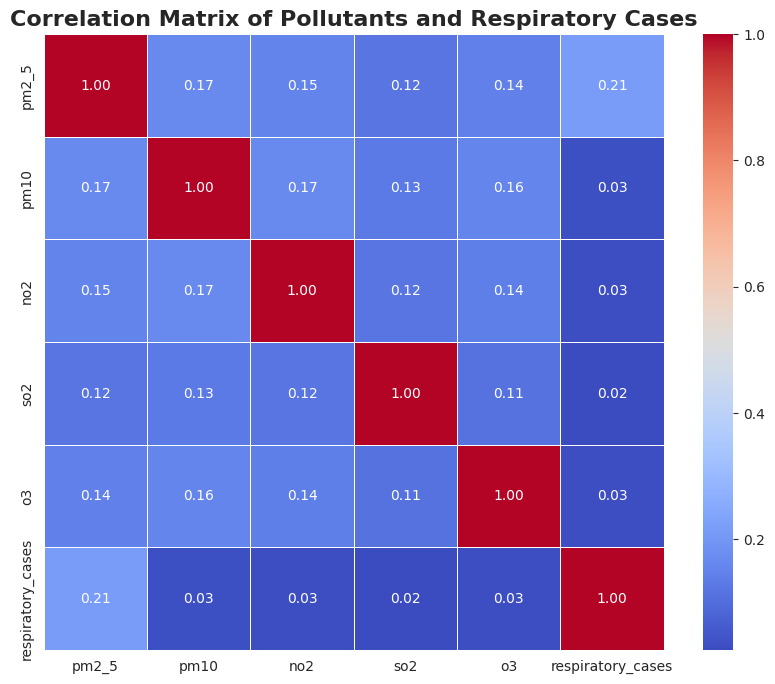

Overall Pearson correlations with respiratory cases:
pm2_5    0.213810
pm10     0.034444
no2      0.031163
o3       0.030638
so2      0.024071
Name: respiratory_cases, dtype: float64


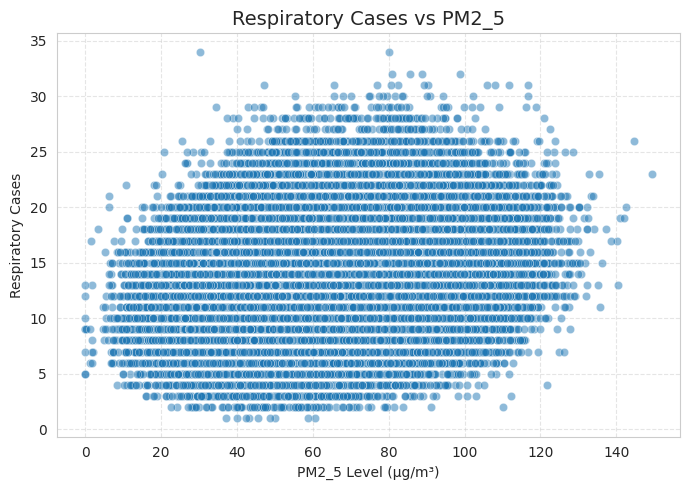

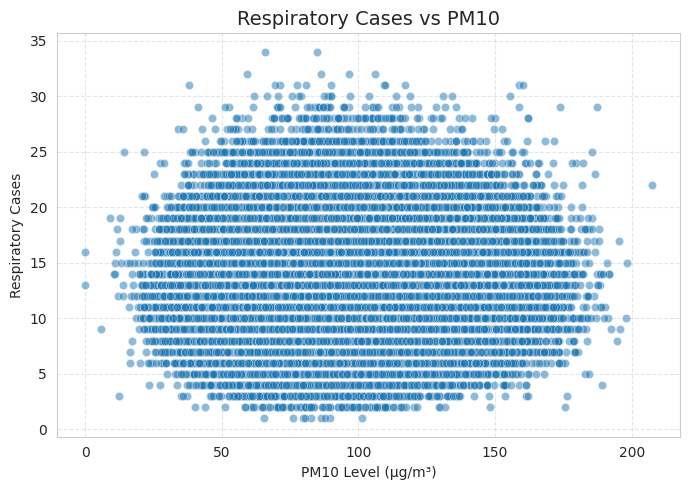

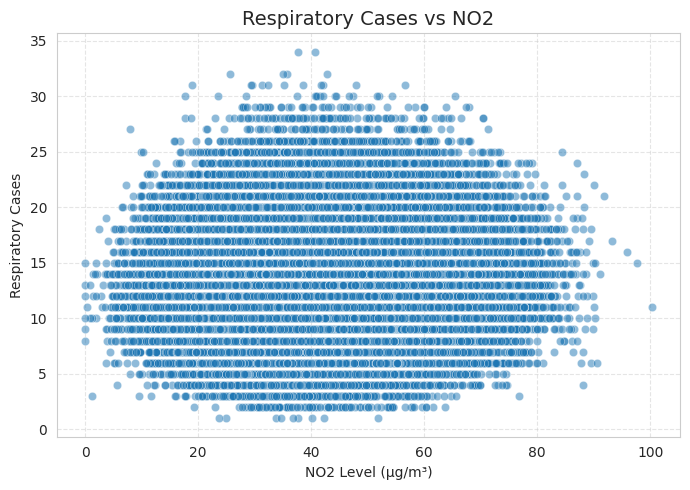

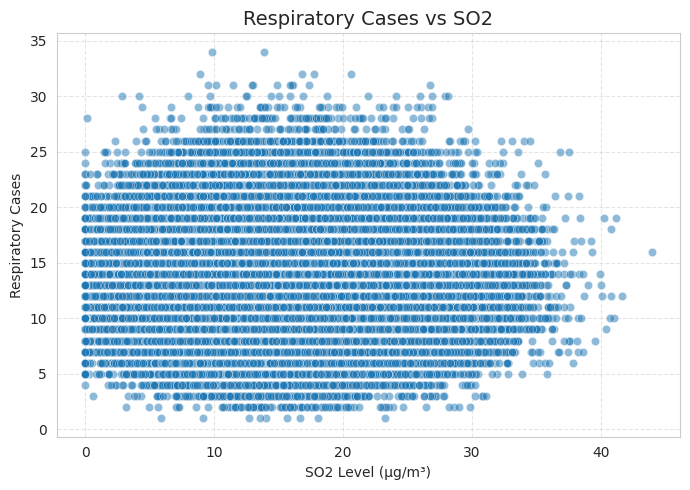

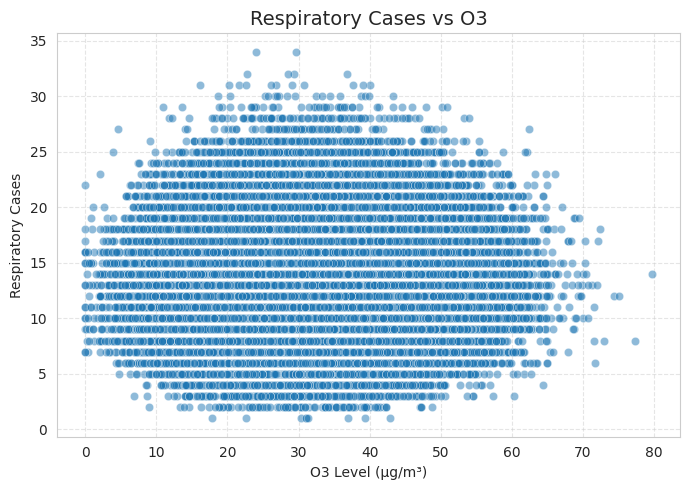

In [ ]:
# Select numerical columns relevant for correlation analysis
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Include pollutants and respiratory cases
correlation_cols = [col for col in numerical_cols if col in pollutants + ['respiratory_cases']]

# Calculate the correlation matrix
correlation_matrix = df[correlation_cols].corr()

# Heatmap to visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Pollutants and Respiratory Cases', fontsize=16, weight='bold')
plt.show()

# Print overall Pearson correlations with respiratory cases
overall_corr = correlation_matrix['respiratory_cases'].drop('respiratory_cases')
print("Overall Pearson correlations with respiratory cases:")
print(overall_corr.sort_values(ascending=False))

# Scatterplots of respiratory cases vs each pollutant
for pollutant in pollutants:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=df, x=pollutant, y='respiratory_cases', alpha=0.5)
    plt.title(f'Respiratory Cases vs {pollutant.upper()}', fontsize=14)
    plt.xlabel(f'{pollutant.upper()} Level (µg/m³)')
    plt.ylabel('Respiratory Cases')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
df.to_csv('/content/drive/MyDrive/EDA_air_pollution_data.csv', index=False)
print("Cleaned data saved successfully!")


Cleaned data saved successfully!


## Analysis Summary, Insights, and Recommendations

Based on the exploratory data analysis of air pollution and respiratory cases across Lagos localities, the following insights and recommendations can be made:

### Yearly Trends in Pollution and Respiratory Cases

*   **Pollutant Trends:** The yearly average pollutant levels for PM2.5, PM10, NO2, SO2, and O3 show variations across cities and over the years (2021-2023). For example, in Ikeja, PM2.5 levels were around 61.5 µg/m³ in 2021 and 2022, increasing to 92.3 µg/m³ in 2023. PM10 levels in Ikeja were consistently high, around 90 µg/m³ across the years. The plots for each city provide specific yearly average values for each pollutant.
*   **Respiratory Case Trends:** The yearly average respiratory cases show slight variations across cities and years. For instance, in Ikeja, average respiratory cases were around 12.88 in 2021, slightly decreasing to 12.86 in 2022 and 12.84 in 2023. While there isn't a strong increasing trend in average cases over these years, the absolute number of cases is significant (as seen in the 'Total Respiratory Cases by Zone' plot).

### Seasonal Pollution Levels

*   **Quantitative Findings:** The analysis clearly shows higher average pollutant levels during the **Dry season (November - March)** compared to the **Rainy season (April - October)**. For example, the average PM2.5 level during the Dry season is approximately 67.1 µg/m³, while during the Rainy season it is around 57.4 µg/m³. Similarly, PM10 averages are 100.7 µg/m³ (Dry) vs 86.1 µg/m³ (Rainy). NO2, SO2, and O3 also show higher averages in the Dry season.
*   **Insight:** The seasonal pattern aligns with typical observations in Nigeria, where harmattan winds and increased burning activities during the dry season contribute to higher air pollution.
*   **Recommendation:** Public health campaigns should focus on raising awareness about increased air pollution risks and preventative measures during the dry season. Air quality monitoring efforts should be intensified during these months.

### Zones and Months with Higher Cases and Pollution

*   **Quantitative Findings:** The total respiratory cases by zone (city) plot shows that **Ikeja and Yaba have the highest total respiratory cases**, followed by Surulere, Lekki, and Ajah. For example, Ikeja has over 800,000 total cases, while Yaba has over 750,000. The average pollution index by month indicates that **January and February have the highest average pollution levels**, with December and November also showing high values, consistent with the dry season.
*   **Insight:** The zones with higher total respiratory cases may be experiencing greater impacts from air pollution, potentially due to higher population density, industrial activity, or specific local emission sources. The monthly pollution trends confirm the dry season as a period of significantly higher pollution risk.
*   **Recommendations:** Targeted public health interventions and air quality improvement initiatives should be prioritized in zones with high respiratory case burdens like Ikeja and Yaba. Strategies to mitigate pollution during peak months (January, February, November, December) are crucial.

### Correlation Between Pollutants and Respiratory Cases

*   **Quantitative Findings:** The correlation matrix and scatter plots show the overall Pearson correlations between individual pollutants and respiratory cases are relatively weak but positive. PM2.5 shows the strongest overall correlation (0.21), while other pollutants have lower correlations (around 0.02-0.03).
*   **Insight:** While the overall immediate correlation is not very strong for all pollutants, PM2.5 appears to have a slightly more pronounced relationship with respiratory cases in this dataset. It is important to consider that these are overall correlations and do not account for potential lagged effects or the influence of other factors.

### Lagged Correlation Between Pollutants and Respiratory Cases (Example for Ikeja)

*   **Quantitative Findings:** The lagged Spearman correlation analysis for Ikeja reveals varying correlation patterns across different lags (days). For PM2.5 in Ikeja, the strongest correlation is observed at a lag of around 0 days (immediate effect) with a correlation of approximately 0.21. For PM10, the strongest correlation might be at a different lag, and so on for other pollutants. The specific lag and correlation value for the strongest relationship for each pollutant in Ikeja are printed in the output.
*   **Insight:** The lagged analysis helps understand if past pollution levels influence current respiratory cases. Different pollutants may have different delayed impacts depending on their chemical properties and how they affect the respiratory system. The relatively low correlation values suggest that while pollution may play a role, other factors likely significantly influence respiratory cases.
*   **Recommendations:** Further investigation into the specific lag periods identified with stronger correlations could provide valuable information for public health warnings and preventative measures. Analyzing lagged correlations for other cities would help determine if these patterns are consistent across Lagos.

### Overall Recommendations:

1.  **Targeted Interventions:** Focus air quality improvement efforts and public health campaigns on cities with the highest respiratory case burden (Ikeja, Yaba) and during peak pollution months (Dry season, particularly January and February).
2.  **Strengthen Monitoring:** Enhance air quality monitoring networks, especially in high-risk zones and during critical seasons, to provide timely and accurate data for public health advisories.
3.  **Multi-factor Analysis:** Conduct further analysis to explore the combined impact of air pollution, weather conditions, population density, and industrial activity on respiratory health to develop more comprehensive intervention strategies.
4.  **Long-term Studies:** Support long-term epidemiological studies to better understand the chronic effects of air pollution exposure on respiratory health in Lagos and to validate the findings from this analysis.
5.  **Public Awareness:** Implement targeted public awareness campaigns to educate residents in high-risk areas about the health risks of air pollution, especially during the dry season, and promote protective behaviors.